In [1]:
# Ensure inline plotting for Jupyter notebooks
%matplotlib inline

# Import the necessary libraries for styling and plotting
from matplotlib import style
import matplotlib.pyplot as plt

# Apply the fivethirtyeight style to the plots
style.use('fivethirtyeight')


In [2]:
# Import essential data manipulation libraries
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Import the necessary SQLAlchemy libraries for ORM (Object Relational Mapping)
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [4]:
# Create a connection to the 'hawaii.sqlite' database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Reflect the existing database into a new model using SQLAlchemy's automap
Base = automap_base()
Base.prepare(engine, reflect=True)

# Print the names of the tables found in the database
Base.classes.keys()


['measurement', 'station']

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Store references to the station and measurement tables
Station = Base.classes.station
Measurement = Base.classes.measurement


In [7]:
# Start a session to connect Python to the database
session = Session(engine)


# Exploratory Precipitation Analysis

In [8]:
# Query the database for the most recent date in the 'Measurement' table
most_recent_date = session.query(func.max(Measurement.date)).scalar()

# Display the most recent date
print("The most recent date in the dataset is:", most_recent_date)


The most recent date in the dataset is: 2017-08-23


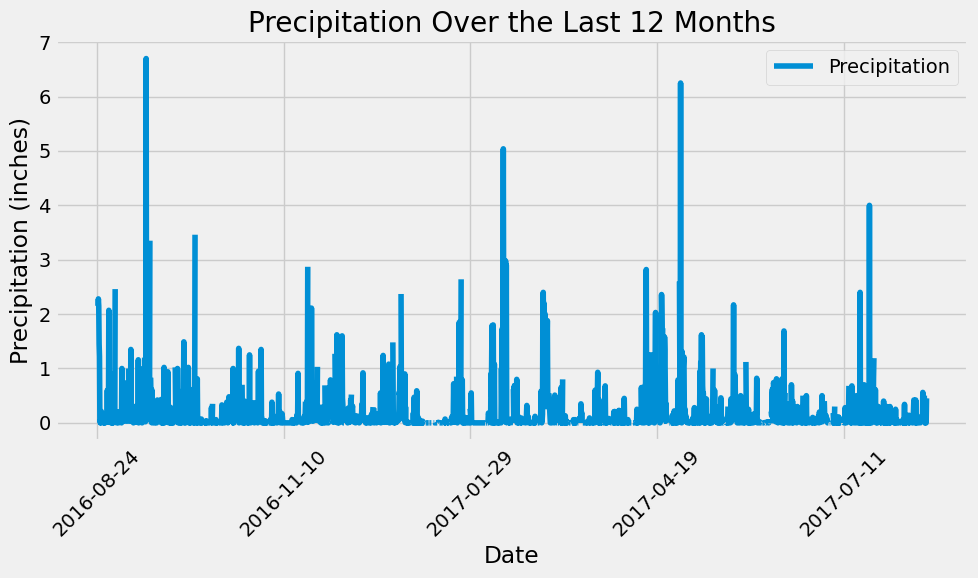

In [9]:
# Calculate the date one year from the last recorded date
one_year_ago = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Query the 'Measurement' table for dates and precipitation data from the last 12 months
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Convert the query results to a Pandas DataFrame and sort by date
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])
precipitation_df = precipitation_df.sort_values(by='Date')

# Plot the precipitation data
precipitation_df.plot(x='Date', y='Precipitation', figsize=(10,6))
plt.title("Precipitation Over the Last 12 Months")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
# Use Pandas to calculate summary statistics for the precipitation data
summary_statistics = precipitation_df['Precipitation'].describe()

# Display the summary statistics
summary_statistics


count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

#Exploratory Station Analysis

In [11]:
# Query the 'Station' table to count the number of unique stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()

# Display the total number of stations
print("Total number of stations in the dataset:", total_stations)


Total number of stations in the dataset: 9


In [12]:
# Query to find the most active stations (i.e., those with the most measurements)
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(desc(func.count(Measurement.station))).all()

# Display the most active stations and their counts
print("Most active stations:")
for station, count in most_active_stations:
    print(f"Station: {station}, Count: {count}")


Most active stations:
Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [13]:
# Extract the ID of the most active station from the query results
most_active_station_id = most_active_stations[0][0]

# Query the 'Measurement' table to calculate temperature statistics for the most active station
temperature_stats = session.query(func.min(Measurement.tobs), 
                                  func.max(Measurement.tobs), 
                                  func.avg(Measurement.tobs)).\
                     filter(Measurement.station == most_active_station_id).all()

# Display the temperature statistics
print(f"Most Active Station ID: {most_active_station_id}")
print(f"Lowest Temperature: {temperature_stats[0][0]}")
print(f"Highest Temperature: {temperature_stats[0][1]}")
print(f"Average Temperature: {temperature_stats[0][2]}")


Most Active Station ID: USC00519281
Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


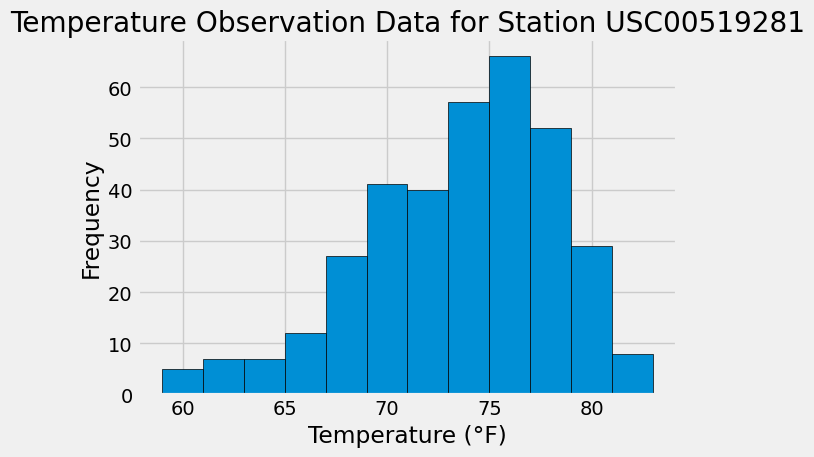

In [14]:
# Query to retrieve temperature data from the last 12 months for the most active station
temperature_data = session.query(Measurement.tobs).\
                    filter(Measurement.station == most_active_station_id).\
                    filter(Measurement.date >= one_year_ago).all()

# Convert the query results to a Pandas DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=['Temperature'])

# Plot the temperature observations as a histogram
plt.hist(temperature_df['Temperature'], bins=12, edgecolor='black')
plt.title(f'Temperature Observation Data for Station {most_active_station_id}')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


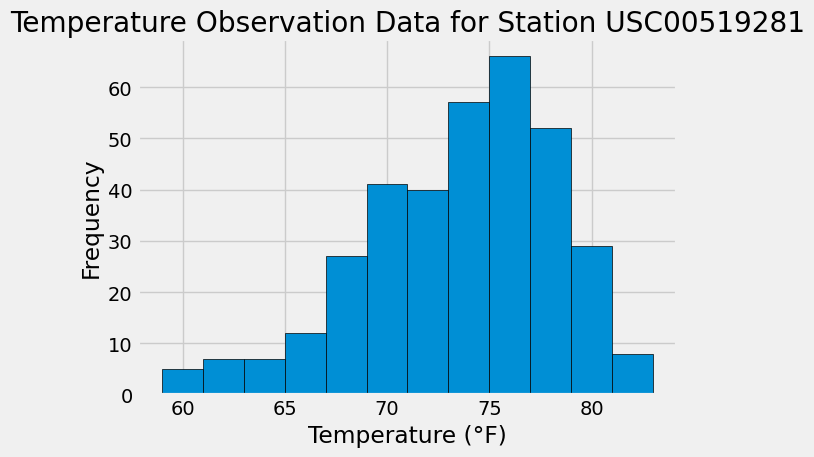

In [15]:
# Query to retrieve temperature data from the last 12 months for the most active station
temperature_data = session.query(Measurement.tobs).\
                    filter(Measurement.station == most_active_station_id).\
                    filter(Measurement.date >= one_year_ago).all()

# Convert the query results to a Pandas DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=['Temperature'])

# Plot the temperature observations as a histogram
plt.hist(temperature_df['Temperature'], bins=12, edgecolor='black')
plt.title(f'Temperature Observation Data for Station {most_active_station_id}')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Close Session

In [16]:
# Close the session to end the connection with the database
session.close()
